# NOTE: 
 

<h1>Description of the problem</h1> 

We have a data-set for few hundred paitents, for each paitent we have some features like their age, blood pressure and etc. And, we know if these paitents have diabetes or not. The objective is to see if by looking at the value of these features for another paitent (for whom we dont know the result of the diabete test) we can "tell" if that person has diabetes (with an acceptable accuracy). This is an example of **supervised machine learning** project. All supervised algorithms have some features and related target/label values. This problem is also a binary classification because our target is either someone has diabetes or not.   
Here are steps we should take:

<ol>
  
  <li>We need to look at our training set and identify features and targets. Here our features are age, bmi, and.... And related labels are diabetes or not.</li>
 
  <li>Do **extensive** data pre-processing (aka: check for crappy data, normalize and/or standardize data and ...). Spoiler alert this step is the most difficult step! </li>
  <li>Decide which ML algorithm is best suited for our problem (if an easy algorithm is good, we dont want to use some fancy and complicated algorithms)</li>
  <li>Use the ML algorithm to train the model, then evaluate our result (check for accuracy, precision and ...)</li>
</ol>

From Intro-to-pandas notebook we have already learnt how to load a csv file. And, we have done some explorations too. Here, I just load the training data-set.

**NOTE 1: This project was part of a Kaggle competition from 4 years ago. (Yes! you can become a Kaggle master very soon!) So, the data had two parts, the training set (labels were included) and the test set which had only the features and you would predict the out come. https://www.kaggle.com/uciml/pima-indians-diabetes-database**

**NOTE 2: many steps in this notebook might look too much! Just bear with me to see how an ML model works. You dont need to get all the details. But, any thing about panda data frame should be easy for you to replicate!** 



In [1]:
# import the library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load csv train-data file
data_frame = pd.read_csv("diabetes-train.csv")

In [3]:
data_frame

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


In [4]:
# to see some initial stat for our data in pandas we can use data_frame.describe(), so we can see what is the mean 
#value of each feature as well as many more stuff:
data_frame.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


# Data pre-processing

1) We need to see if we have any null or nan values. Most ML algorithms cant deal with nan and null.

2) it is ALWAYS a good practice to see how many of our target values are labeled 1 and how many as 0. We dont really like to deal with a super skewed data! :/ 

3) We have already seen in the previous notebooks that data visulization can be really helpful! So, for each feature we want to plot a histogram. Histograms will tell us some good stuff, like we can see if we have some outliers (if we see some large values). 

In [5]:
# look for nan and null
print (data_frame.isnull().values.any())


False


In [6]:
label1 = data_frame[data_frame.diabetes == 1]
label0 = data_frame[data_frame.diabetes == 0]
print("number of plp with diabetes:",label1['diabetes'].count())
print("number of plp without diabetes:",label0['diabetes'].count())

number of plp with diabetes: 214
number of plp without diabetes: 400


(array([190., 149., 100.,  42.,  62.,  45.,   9.,  14.,   2.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

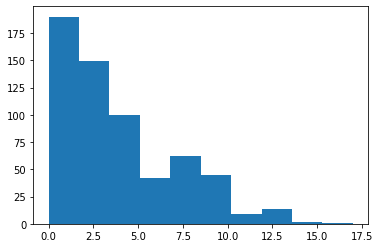

In [7]:
# here for each of the features we can make a histogram, I plotted one as an example
plt.hist(data_frame["no_times_pregnant"])

diabetes
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

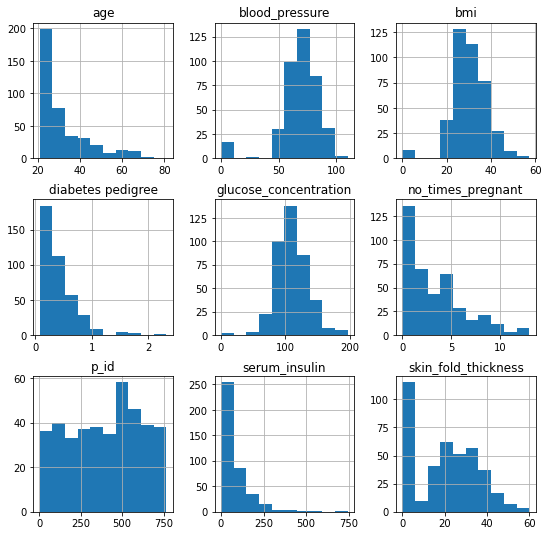

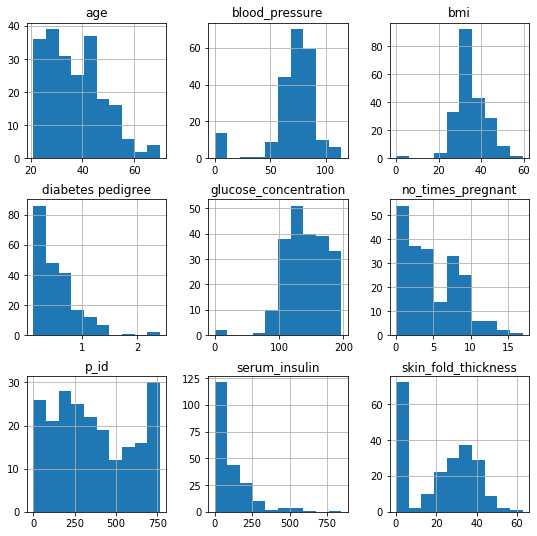

In [8]:
# instead of plotting each seprately, I can do a trick and plot them all together as follow:
# groupby command let you group all features according to one specific value. 
data_frame.groupby("diabetes").hist(figsize=(9, 9))


Remeber you had this question to answer:

How many of people in the dataframe have skin-fold-thickness equals to 0?

--- 
here we need to think about these questions with more caution! From histogram we can see for some features we have lots of zeros! Are they real? Is it possible to find some one with no skin-thickness?? No! so, here, we need to look at each feature and decide for which of them 0 is not a valid value!  

1) All people in the data frame are older than 0 (as you can see in the histogram)

2) People should have bmi, glucose_concentration (gc), blood_pressure (bp) and skin_fold_thickness (st) bigger than 0, but we can see this is not the case with our data!

3) People can have serum_insulin equal to zero

So what can we do here? at first we need to see how many 0 values do we have for each of the features mentioned in item 2 (This was the excercise from the Intro_to_Panda lesson).

____
So, here we are: 

- 4 paitents have gc == 0
- 10 paitentes have bmi == 0
- 31 paitnets have bp == 0
- 187 paitents have st == 0

## How should we deal with this problem? 

- One option is to ignore take these paitents (data-sets) out of our data frame. This might be a good approach for gc, bp, and bmi, but for st this means that we are gonna lose 187 data points. As we only have 614 data points this will be a huge drop! A quick look shows that we can easily drop rows in which we have 0 value for bmi and gc. Infact, 5 (out of 10) paitents with no bmi, have no record of bp as well! 

- One other option is to change the value of 0, with the mean value of the column. I will use this method for bp.
- For st because there are lots of 0 values and it is not such a great indicator of diabetes. Maybe the best practice is to delet the feature (drop the column from the data frame)

In [9]:
# here we only select rows in which the bmi value and gc value are not zero! 
data_frame = data_frame[(data_frame.bmi !=0) & ((data_frame. glucose_concentration != 0))]

In [10]:
 # here we change the 0 values to the mean of all other values
bp_1 = data_frame[data_frame.blood_pressure !=0]
mean_bp  = int(bp_1.loc[:,('blood_pressure')].mean())

data_frame.loc[:,('blood_pressure')] =data_frame.loc[:,('blood_pressure')].mask(data_frame.blood_pressure  == 0, mean_bp)



/Users/wearmelab/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
data_frame = data_frame.drop(columns=['skin_fold_thickness'])

# Let's tarin our model

We have some features (bmi, bp, ...) that will be used to predict (we call it X) and we have some labeles (we call it Y). If we look at our features we see they cover different range of values, someone's age is between 21 and 81, but number of times being pregnant is ranged between 0 and 17. It is essential to some how tell our model that just because the range of age is bigger than range of number of pregnancies (value for age is bigger) this does not mean that age is more important! For this reason we would like to bring our feature values within the same range. There are different methods for it which we will talk in details about it later. For now, we are just using a library in Python (**scikit-learn**) to help us deal with the range of values issue. 

## scikit-learn

This library is widely used for machine learning project. It has wide range of capabilities (from data pre-processing to implementing machine learning algorithms). In this project we used the library for following purposes: 

- put our data within the same range: as explained above! 

- split our data into train and test: we need to split our data to two parts one part will be used for training while the other part will sit as a test set, to evaluate our model (see how good the algorithm learnt the relation between the features and labels).

- implement a machine learning algorithm: For now we just import an algorithm as a black box and later in next lessons we dig into characteristics of the model. I chose logistic regression model here because it is one of those algorithms that we will talk about it later!  



In [12]:
# I use .iloc to select COLUMNS I need for my features (the last column and first columns are not incuded then)
# X is my feature set
X = data_frame.iloc[:, 1:-1]
Y = data_frame.iloc[:,-1]


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_evaluate, Y_train, Y_evaluate = train_test_split(X_standard, Y, test_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

Y_pred = clf.predict(X_evaluate)



# How good is our model? 

We get to predict the outcome for people who were part of our evaluation set, and we had their features (X_evaluate). Now, we need to compare the prediction's outcome with the true outcome (true label for each of these people to see if our prediction matches the diagnosis). The idea is that we want to see how many of the cases are labeled correctly (either true positive (TP) or true negative (TN)). And, how many of them are labeled wrongly (false positive (FP) or false negative (FN)). One good way of doing this is to use a confusion matrix. Before that lets talk more about TP, TN, FP, FN:

- TP: Predicted positive outcome (here this means the person has diabetes) and the prediction is true
- TN: Predicted negative outcome (here this means the person does not have diabetes) and the prediction is true
- FP: (Type I Error): Predicted positive outcome but the prediction is false. 
- FN: (Type II Error): Predicted negaive outcome but the prediction is false. 

**Recall**: We are interested to see how much of the positive cases were captured by the model correctly and we hope we capture most of the positive cases (the same logic can be used to find the percentage for negative cases being captured corectly). So, we can use the following formula:  

$Recall = \frac{TP}{TP + FN}$

**Precision**: We also want to see how much of cases which are predcited/labeled as positive in our model are truley positive cases:

$Precision = \frac{TP}{TP + FP}$

**Accuracy**: One more thing to care about is accuracy, meaning what percentage of predictions are true:

$Accuracy = \frac{TP+TN}{TP +TN+ FP + FN}$

Using a confusion matrix we can visually see TP, TN, FP and FN values for our model. And, it is easy to have it in Python as follows:   

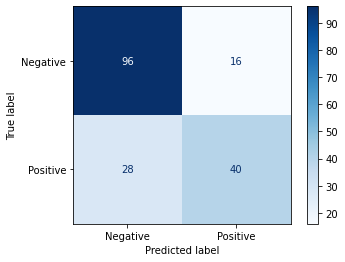

In [16]:
from sklearn.metrics import plot_confusion_matrix
class_names = ['Negative', 'Positive', ]

plot_confusion_matrix(clf, X_evaluate, Y_evaluate, cmap=plt.cm.Blues, display_labels=class_names)

From the above confusion matrix we can easily see that the diagonal values of this plot are TN and TP. 
## Excercies: 

1) Find the Precision, Recall, and accuracy using the above information and the confusion matrix. 

2) Will you trust this model? Why or Why not?

3) How can we make a model better? (--- this is the main question in ML!)